In [73]:
import configparser
import tweepy
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/nust61/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
# ___Cell no. 2___

# We then import the credentials
import twitter_credentials as tc

In [75]:
config = configparser.ConfigParser()
config.read('config.ini')

# authenticate
auth = tweepy.OAuthHandler(tc.api_key, tc.api_secret_key)
auth.set_access_token(tc.access_token, tc.access_token_secret)

api = tweepy.API(auth)

In [80]:
search_words = "lockdown"

# Latitude, logitude and search radius(km) for Zambia and some surrounding regions
loc = "-22.5716425,17.0585621,1000km"

# Search dates
date_since = "2022-04-20"
date_until = "2022-04-27"

my_search = search_words + " -filter:retweets" + "-fiilter:replies" 

In [81]:
public_tweets = tweepy.Cursor(api.search,
                       q=my_search,
                       lang="en",
                       tweet_mode='extended',
                       geocode=loc,
                       
                       ).items(1000)

In [82]:
import pandas as pd

# create dataframe
columns = ['Time','User','Location', 'Tweet']

data = []
for tweet in public_tweets:
    data.append([tweet.created_at,tweet.user.screen_name, tweet.user.location,tweet.full_text])

df = pd.DataFrame(data, columns=columns)



In [83]:
df

,Time,User,Location,Tweet
0,2022-04-28 07:52:32,SABreakingNews,South Africa,READER LETTER | Cyril must invoke new measures...
1,2022-04-28 07:31:26,Westpoi24838951,North West,Most definitely and where was he staying as th...
2,2022-04-28 07:06:55,mollamachine,Pta,@BarneySimon Nou mis almal lockdown😅
3,2022-04-28 06:57:05,Olwee,"Gauteng, South Africa","Until we lot invaded Mai Mai over lockdown, th..."
4,2022-04-28 06:44:12,Senhora_Maphumy,"Johannesburg, South Africa",@odnat_1 It was a calm and quite place after l...
...,...,...,...,...
834,2022-04-20 04:46:21,TheBigChairman4,"Lusaka, Zambia",@Bobwinah Lockdown footy surely can't be taken...
835,2022-04-20 04:15:11,MorningLiveSABC,South Africa,China is continuing to battle a growing COVID-...
836,2022-04-20 04:05:43,ScuffleThe,South Africa,The Scuffle Continues : Lockdown : https://t.c...
837,2022-04-20 04:04:12,Kizmiarz,South Africa,@ImNotSkyeZA @jvnaidoo1 Nope! Since lockdown I...


In [60]:
## Cleaning the Data

In [61]:
def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

In [62]:
df['Tweet']=df['Tweet'].apply(clean_text)

In [63]:
##this sets all text to lower case
df['Tweet']=df['Tweet'].str.lower()


In [69]:
#add stopwords using a stopwords dictionary


In [65]:
def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [70]:
# Apply the stopword removal function to the text of all tweets


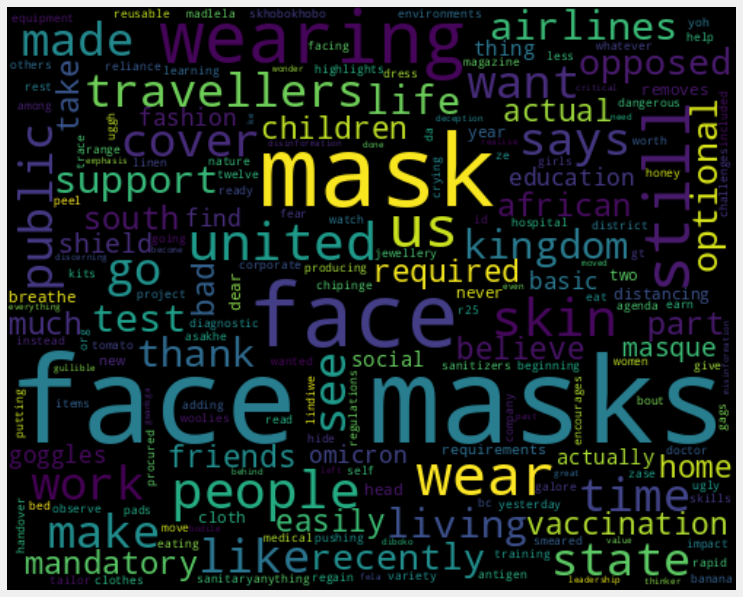

In [71]:
# Plot a word cloud

all_words = ' '.join( [data for data in df['Tweet']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Has Been Prepped!

In [72]:
df.to_csv('tweets.csv')